### 강화학습 환경 [OpenAI Gym](https://github.com/openai/gym/wiki/Leaderboard#mountaincar-v0)
* OpenAI 재단은 강화학습의 이론을 학습하기 위해 만들어 놓은 환경인 Gym을 2016년에 발표했고 이것은 세계의 연구자들 사이에 거의 표준으로 자리잡았음
* Gym에는 전통적인 알고리즘 흉내내기, Box2D를 사용한 물리 조작계, 아타리(Atari) 게임, 로봇 시뮬레이션 등 다양한 환경이 포함되어 있음
* 다른 연구자들이 Gym과 호환되는 새로운 환경을 만들어서 배포하는 것도 가능함
---
* Gym의 구조는 강화학습에서 요구하는 표준적인 구조임
* 문제가 주어진 환경(environment)이 있고, 강화학습 문제를 풀기 위한 에이전트(agent)가 존재함
* 에이전트는 행동(action)으로 환경에 영향을 주고, 그 결과에 따라 보상(reward)을 받음
* 좋은 보상을 받으면 에이전트는 그 행동을 더 많이 하게 되고, 나쁜 보상을 받으면 그 행동을 덜 하도록 학습하는 것이 강화학습의 기본임
* 강화학습은 행동의 결과로 주어지는 보상을 극대화하는 데 주 목적이 있음

### 회귀 신경망으로 경험 학습하기 : Gym MountainCarContinuous-v0
* 행동 공간이 이산적이지 않고 연속적인 환경임
* 행동 공간이 연속적이라는 의미는 행동을 선택할 때 0, 1, 2 같은 행동의 인덱스 대신 0.56213, -0.33248 같은 연속적인 값을 골라야 한다는 의미임
* [MountainCarContinuous-v0의 동작 그림](https://github.com/edu-cafe/img/blob/rl/MountainCar-v0.gif)
---
### [MountainCarContinuous-v0 Environment](https://gym.openai.com/envs/MountainCarContinuous-v0/)
* Agent Action : -1 ~ 1 
<br> - 왼쪽과 오른쪽으로 반복해서 움직이며 가속도를 붙인 다음에야 언덕을 올라갈 수 있음
* Observation : Position(-1.2 ~ 0.6), Velocity(-0.07 ~ 0.07)
* Reward : 목표 위치 0.5에 도달 할 때까지 각 시간 단계마다 행동의 제곱에 0.1을 곱합 값의 음수, 깃발에 도착하면 +100, 움직이지 않으면 0
* Starting State : 속도가없는 -0.6 ~ -0.4의 임의 위치
* Episode Termination : 에피소드는 0.5 위치에 도달하거나 999 회 반복에 도달하면 종료됨
* Solved Requirements : 연속된 100회의 에피소드에서 +90 이상의 누적 보상을 받는 것

In [1]:
colab = 1
test = 1

In [2]:
# import tensorflow as tf 
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#     # Currently, memory growth needs to be the same across GPUs
#     for gpu in gpus:
#       tf.config.experimental.set_memory_growth(gpu, True)
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Memory growth must be set before GPUs have been initialized
#     print(e)

In [3]:
# 텐서플로 2 버전 선택
# try:
#     # %tensorflow_version only exists in Colab.
#     %tensorflow_version 2.x
# except Exception:
#     pass
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.5.0


In [4]:
if colab:
    !pip install gym pyvirtualdisplay
    !apt-get install -y xvfb python-opengl ffmpeg

    !apt-get update
    !apt-get install cmake
    !pip install --upgrade setuptools
    !pip install ez_setup
    !pip install gym[atari]

    !pip install box2d-py
    !pip install gym[Box_2D]
else:
    #!pip install gym
    pass

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
H

In [5]:
# MountainCarContinuous-v0 환경 만들기

import gym
import random

env = gym.make('MountainCarContinuous-v0')

print(env.observation_space)
print(env.observation_space.low)
print(env.observation_space.high)
print()
print(env.action_space)
print(env.action_space.low)
print(env.action_space.high)
print()
print(env._max_episode_steps)
env.close()

Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
[-1.2  -0.07]
[0.6  0.07]

Box(-1.0, 1.0, (1,), float32)
[-1.]
[1.]

999


In [6]:
if colab:
    # env.render() 함수의 결과를 mp4 동영상으로 보여주기 위한 코드
    # from https://colab.research.google.com/drive/1flu31ulJlgiRL1dnN2ir8wGh9p7Zij2t
    from gym import logger as gymlogger
    from gym.wrappers import Monitor
    gymlogger.set_level(40) #error only
    import glob
    import io
    import base64
    from IPython.display import HTML
    from IPython import display as ipythondisplay

    """
    Utility functions to enable video recording of gym environment and displaying it
    To enable video, just do "env = wrap_env(env)""
    """

    def show_video():
        mp4list = glob.glob('video/*.mp4')
        if len(mp4list) > 0:
            mp4 = mp4list[0]
            video = io.open(mp4, 'r+b').read()
            encoded = base64.b64encode(video)
            ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                 </video>'''.format(encoded.decode('ascii'))))
        else: 
            print("Could not find video")


    def wrap_env(env):
        env = Monitor(env, './video', force=True)
        return env
    
    
    from pyvirtualdisplay import Display
    display = Display(visible=0, size=(1400, 900))
    display.start()

In [7]:
if test:
    # 랜덤 행동 에이전트의 환경 실행 결과 확인
    if colab: env = wrap_env(gym.make('MountainCarContinuous-v0'))
    else: env = gym.make('MountainCarContinuous-v0')
    env.reset()
    input('Enter to start ..')

    score = 0
    step = 0
    while True:
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        score += reward
        step += 1
    #     print('==>step_', + step, ' action: ', action, 'obs:', obs, 'reward:', reward, 'done:', done, 'info:', info)
    #     print('-->step_', + step, 'score:', score)
  
        if not colab: 
            if(step%10 == 0) :
                input(f'Enter to continue({step}) ..')
            env.render()      

        if done:
            input('Enter to stop ..')
            env.close()
            break

    print('score:', score)
    print('step:', step)
    if colab: 
        show_video()
        

Enter to start ..
Enter to stop ..
score: -32.94088379261565
step: 999


In [8]:
%%time
# local-gpu : 약 1분 30초, colab : 약 1분 49초 
env = gym.make('MountainCarContinuous-v0')

# 성공적인 에피소드 저장
scores = []
training_data = []
accepted_scores = []
required_score = -198

for ep in range(10000):
    if ep % 100 == 0:  print('==>episode:', ep)
    env.reset()
    score = 0
    game_memory = []
    previous_obs = []
    
    for i in range(200):
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        
        if len(previous_obs) > 0:
            game_memory.append([previous_obs, action])
        
        previous_obs = obs
        if obs[0] > -0.2:
            reward = 1
        else:
            reward = -1
        
        score += reward
        
        if done:            break
        
    if ep % 100 == 0:
      print('-->step:', step, 'obs:', obs, 'action:', action, 'reward:', reward, 'score:', score)
    scores.append(score)
    if score > required_score:
        accepted_scores.append(score)
        for data in game_memory:
            training_data.append(data)

scores = np.array(scores)
print(scores.mean())
print(accepted_scores)

==>episode: 0
-->step: 999 obs: [-0.74125962  0.02589676] action: [0.70378757] reward: -1 score: -190
==>episode: 100
-->step: 999 obs: [-0.54104884 -0.01858171] action: [-0.00953266] reward: -1 score: -200
==>episode: 200
-->step: 999 obs: [-0.38080205 -0.00441335] action: [-0.5415246] reward: -1 score: -200
==>episode: 300
-->step: 999 obs: [-0.30793457  0.00483267] action: [-0.89741397] reward: -1 score: -200
==>episode: 400
-->step: 999 obs: [-0.4596576   0.01016343] action: [-0.5926757] reward: -1 score: -200
==>episode: 500
-->step: 999 obs: [-0.42760775  0.00478606] action: [0.0179499] reward: -1 score: -200
==>episode: 600
-->step: 999 obs: [-0.47339057 -0.0115658 ] action: [-0.9454895] reward: -1 score: -200
==>episode: 700
-->step: 999 obs: [-0.5155375  -0.00424916] action: [0.7921456] reward: -1 score: -200
==>episode: 800
-->step: 999 obs: [-0.46256114 -0.00220122] action: [0.6554053] reward: -1 score: -200
==>episode: 900
-->step: 999 obs: [-0.74309222  0.00320362] action:

-199.835
88
[-190, -172, -176, -196, -184, -192, -190, -170, -186, -176]
17512


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


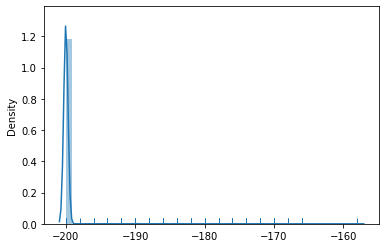

In [9]:
print(scores.mean())
print(len(accepted_scores))
print(accepted_scores[:10])
print(len(training_data))

import seaborn as sns
sns.distplot(scores, rug=True)

In [10]:
# 데이터 준비 및 회귀 모델 정의
train_X = np.array([i[0] for i in training_data]).reshape(-1, 2)
train_Y = np.array([i[1] for i in training_data]).reshape(-1, 1)
print(train_X.shape)
print(train_Y.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(1, activation='linear')
])
model.compile(optimizer=tf.optimizers.Adam(), loss='mse')

(17512, 2)
(17512, 1)


In [11]:
%%time
# local_gpu : 약 21 초, colab : 약 26 초 
# 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=30, validation_split=0.25)

Epoch 1/30
411/411 [==============================] - 2s 2ms/step - loss: 0.3367 - val_loss: 0.3347
Epoch 2/30
411/411 [==============================] - 1s 2ms/step - loss: 0.3355 - val_loss: 0.3371
Epoch 3/30
411/411 [==============================] - 1s 2ms/step - loss: 0.3333 - val_loss: 0.3362
Epoch 4/30
411/411 [==============================] - 1s 2ms/step - loss: 0.3328 - val_loss: 0.3342
Epoch 5/30
411/411 [==============================] - 1s 2ms/step - loss: 0.3327 - val_loss: 0.3366
Epoch 6/30
411/411 [==============================] - 1s 2ms/step - loss: 0.3321 - val_loss: 0.3352
Epoch 7/30
411/411 [==============================] - 1s 2ms/step - loss: 0.3323 - val_loss: 0.3341
Epoch 8/30
411/411 [==============================] - 1s 2ms/step - loss: 0.3321 - val_loss: 0.3342
Epoch 9/30
411/411 [==============================] - 1s 2ms/step - loss: 0.3320 - val_loss: 0.3346
Epoch 10/30
411/411 [==============================] - 1s 2ms/step - loss: 0.3321 - val_loss: 0.3342

In [12]:
%%time
# local_gpu : 약 3시간 19분, colab : 약 3시간 26분 --> ep500
# local_gpu : 약 분, colab : 약 19 분 --> ep50

# 회귀 신경망으로 에이전트 행동 확인
scores = []
steps = []
actions = []

# for i in range(500):
for i in range(50):
    # if i % 100 == 99:
    if i % 10 == 9:
        print(i, 'mean score: {}, mean step: {}'.format(np.mean(scores[-100:]), np.mean(steps[-100:])))
    score = 0
    step = 0
    previous_obs = []
    env.reset()

    while True:
        if len(previous_obs) == 0:
            action = env.action_space.sample()
        else:
            action = model.predict(np.expand_dims(previous_obs, axis=0))[0]
            actions.append(action)
        
        obs, reward, done, info = env.step(action)
        previous_obs = obs
        score += reward
        step += 1

        if done:  env.close();    break
    
    scores.append(score)
    steps.append(step)

9 mean score: 99.13609751991773, mean step: 640.5555555555555
19 mean score: 88.64750146420471, mean step: 710.1052631578947
29 mean score: 88.80123798879644, mean step: 720.8965517241379
39 mean score: 91.46313530138482, mean step: 692.5897435897435
49 mean score: 90.98235812199268, mean step: 694.9795918367347
CPU times: user 17min 17s, sys: 38 s, total: 17min 55s
Wall time: 18min 40s


91.14525564647785


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

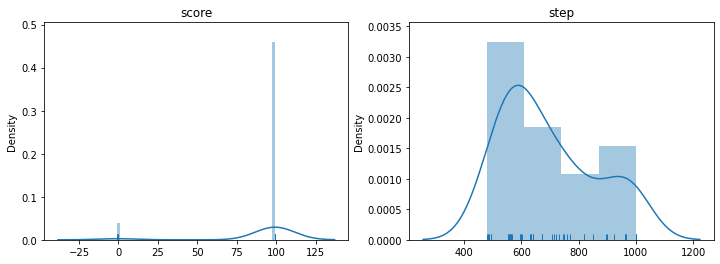

In [13]:
# score, step 분포 확인
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.distplot(scores, rug=True, ax=ax[0])
sns.distplot(steps, rug=True, ax=ax[1])

print(np.mean(scores))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


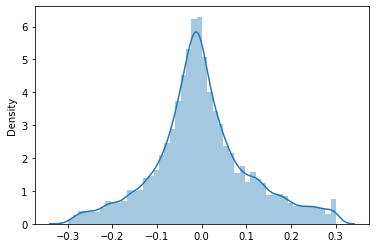

In [14]:
# 행동 분포 확인
sns.distplot(actions)

In [15]:
%%time
# local-gpu : 약 29초, colab: 약 31초

# 회귀 신경망 행동 에이전트 실행 결과 확인
if colab:  
  env = wrap_env(gym.make('MountainCarContinuous-v0'))
else:
  env = gym.make('MountainCarContinuous-v0')
env.reset()

score = 0
step = 0
previous_obs = []
while True:
    if len(previous_obs) == 0:
        action = env.action_space.sample()
    else:
        action = model.predict(np.expand_dims(previous_obs, axis=0))[0]
    
    obs, reward, done, info = env.step(action)
    previous_obs = obs
    score += reward
    step += 1
    
    if not colab: env.render()
    if done:
      env.close()   
      break

print('score:', score)
print('step:', step)
if colab:
  show_video()


score: 98.87446847703849
step: 860


CPU times: user 32.2 s, sys: 1.36 s, total: 33.6 s
Wall time: 37.6 s


* 회귀 신경망으로 이 문제를 푸는 데는 한계가 있음 --> 관찰 상태에 대한 적절한 행동을 찾아내지 못하기 때문 

### 큐러닝으로 경험 학습하기 : Gym MountainCarContinuous-v0
* 큐러닝은 관찰 상태에서 취할 수 있는 모든 행동의 Q(Quality)값을 학습하는 방법임
* 특정 상태에서 어떤 행동의 Q값이 다른 행동보다 높다면 Q값이 높은 행동을 우선적으로 선택하게 됨
* 가장 높은 Q값을 가진 행동을 선택할 수도 있고, 소프트맥스 함수로 각 Q값을 입력으로 삼아 확률을 기반으로 한 행동을 선택할 수도 있음
* Q 값이 높으면 당연히 선택될 확률이 높아짐
* 큐테이블(Q-Table) : 모든 상태에 대한 모든 행동의 Q값을 저장
* **큐테이블을 학습시키는 과정이 큐러닝임**
* Q값 계산식 : q_table
<br> ***Q(s,a) = Q(s,a) + a(알파) * (R + r*maxQ(s',a') - Q(s,a))***
* 학습된 큐테이블을 참조하면 큐러닝 에이전트를 움직일 수 있음
* MountainCarContinuous-v0에서는 행동 공간이 연속적이기 때문에 모든 값에 대한 Q값을 계산하는 것은 불가능함
<br> - 행동 공간을 일정한 격자(grid)로 나눠서 해당 격자에 대한 Q값을 계산할 수 있음
---
### MountainCarContinuous-v0 Environment
* Agent Action : -1 ~ 1 
<br> - 왼쪽과 오른쪽으로 반복해서 움직이며 가속도를 붙인 다음에야 언덕을 올라갈 수 있음
* Observation : Position(-1.2 ~ 0.6), Velocity(-0.07 ~ 0.07)
* Reward : 목표 위치 0.5에 도달 할 때까지 각 시간 단계마다 행동의 제곱에 0.1을 곱합 값의 음수, 깃발에 도착하면 +100, 움직이지 않으면 0
* Starting State : 속도가없는 -0.6 ~ -0.4의 임의 위치
* Episode Termination : 에피소드는 0.5 위치에 도달하거나 999 회 반복에 도달하면 종료됨
* Solved Requirements : 연속된 100회의 에피소드에서 +90 이상의 누적 보상을 받는 것

In [16]:
if test:
  q_table = []
  print(q_table)
  q_table.append([])
  print(q_table, np.shape(q_table))
  q_table.append([])
  print(q_table, np.shape(q_table))
  q_table[0] = 1
  q_table[1] = 2
  print(q_table, np.shape(q_table))

[]
[[]] (1, 0)
[[], []] (2, 0)
[1, 2] (2,)


In [17]:
if test:
  q_table = []
  print(q_table)
  q_table.append([])
  print(q_table, np.shape(q_table))
  q_table[0].append([])
  print(q_table, np.shape(q_table))
  q_table[0][0] = 0.1
  print(q_table, np.shape(q_table))
  q_table.append([])
  print(q_table, np.shape(q_table))
  q_table[1].append([])
  print(q_table, np.shape(q_table))
  q_table[1][0] = 0.2
  print(q_table, np.shape(q_table))

[]
[[]] (1, 0)
[[[]]] (1, 1, 0)
[[0.1]] (1, 1)
[[0.1], []] (2,)
[[0.1], [[]]] (2, 1)
[[0.1], [0.2]] (2, 1)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [18]:
# 관찰 공간과 행동 공간을 격자화
# q_table : 3차원의 큐테이블을 저장함 (모든 행동의 Q값을 저장함, 관찰 공간이 2차원임)
# q_table 차원 수 : 관찰 공간 차원 수 + 1
# Q 값 : 관찰 공간 크기(10 x 10 = 100) x 행동(6) = 600개 

state_grid_count = 10
action_grid_count = 6

q_table = []
for i in range(state_grid_count):
    q_table.append([])
    for j in range(state_grid_count):
        q_table[i].append([])
        for k in range(action_grid_count):
            q_table[i][j].append(1e-4)  # q_table 초기화 (0.0001)
            # 초기 Q값을 높게 줄수록 처음에 시도했던 행동이 효과적이지 않을 때 다른 행동을 탐색해볼 확률이 높아짐

print('qtable_shape:', np.shape(q_table))          
actions = range(action_grid_count)
print('before:', actions)  # range(0, 6)

actions = np.array(actions).astype(float)
actions *= ((env.action_space.high - env.action_space.low) / (action_grid_count - 1))
actions += env.action_space.low

print('after:', actions) # [-1.         -0.59999999 -0.19999999  0.20000002  0.60000002  1.00000003]
# -1과 1사이의 6개 값 -> 이 범위를 넘는 값은 환경의 setup() 함수에서 모든 행동 값을 -1 ~ 1 값으로 조정함

qtable_shape: (10, 10, 6)
before: range(0, 6)
after: [-1.         -0.59999999 -0.19999999  0.20000002  0.60000002  1.00000003]


In [19]:
# obs_to_state, softmax 함수 정의
import random

# 관찰 상태를 각 격자에 배당하는 기능 : 격자의 인덱스 반환함
def obs_to_state(env, obs):
    obs = obs.flatten()
    low = env.observation_space.low
    high = env.observation_space.high
    idx = (obs - low) / (high - low) * state_grid_count
    idx = [int(x) for x in idx]
    return idx

def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    sum_exp_logits = np.sum(exp_logits)
    return exp_logits / sum_exp_logits

In [20]:
if test:
  sample = env.observation_space.sample()
  grid = obs_to_state(env, sample)
  print(sample)
  print(grid)

[-0.92971975  0.00875453]
[1, 5]


In [21]:
%%time
# local-gpu :  약 ??초, colab : 약 ??분 ??초

env.close()
if colab:  
  env = wrap_env(gym.make('MountainCarContinuous-v0'))
else:
  env = gym.make('MountainCarContinuous-v0')
env.reset()

# 큐러닝 에이전트 학습
max_episodes = 10000
scores = []
steps = []
select_actions = []

learning_rate = 0.05
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01

for i in range(max_episodes):
    epsilon *= 0.9  # epsilon decay 적용
    epsilon = max(epsilon_min, epsilon)
    
    if i % 100 == 0 and i != 0:
        print(i, 'mean score: {}, mean step: {}, epsilon: {}'.format(np.mean(scores[-100:]), np.mean(steps[-100:]), epsilon))
        
    previous_obs = env.reset()
    score = 0
    step = 0
    
    while True:
        state_idx = obs_to_state(env, previous_obs)
        # 입실론-탐욕 정책(epsilon-greedy policy) 사용
        # 난수가 입실론 값보다 작을 때는 랜덤한 행동을 선택, 
        # 그렇지 않은 경우에는 지금까지 찾은 것 중에서 가장 좋은 방법을 선택하는 방법
        # 처음에는 탐색(exploration)하고, 나중에는 최적 행동을 이용(exploitation)하는 방법
        # epsilon decay 적용
        if random.random() < epsilon:
            action_idx = random.randint(0, action_grid_count-1)
            action = actions[action_idx]
        else:
            logits = q_table[state_idx[0]][state_idx[1]]
            action_idx = np.argmax(softmax(logits))
            action = actions[action_idx]
        
        obs, reward, done, info = env.step([action])
        previous_obs = obs
        score += reward
        reward -= 0.05  # 큐러닝이 빠르게 정답을 찾을 수 있도록 스텝마다 -0.05의 보상을 더함, 에이전트가 움직이도록 자극하는 역할을 함
        step += 1
        
        select_actions.append(action)
        
        new_state_idx = obs_to_state(env, obs)
        
        # DQN 계산식 :  Q(s,a) = Q(s,a) + a(알파) * (R + r*maxQ(s',a') - Q(s,a))
        q_table[state_idx[0]][state_idx[1]][action_idx] = \
            q_table[state_idx[0]][state_idx[1]][action_idx] + \
            learning_rate * (reward + gamma * np.amax(q_table[new_state_idx[0]][new_state_idx[1]]) - q_table[state_idx[0]][state_idx[1]][action_idx])
        
        if done:       break
    
    scores.append(score)   
    steps.append(step)
    
    if np.mean(scores[-100:]) >= 90:
        print('Solved on episode {}!'.format(i))
        break

100 mean score: -11.074080893344837, mean step: 946.84, epsilon: 0.01
200 mean score: 85.8880794836593, mean step: 479.26, epsilon: 0.01
300 mean score: 85.3768394381976, mean step: 434.27, epsilon: 0.01
Solved on episode 351!
CPU times: user 46.4 s, sys: 2.16 s, total: 48.6 s
Wall time: 1min


59.192522105180416


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

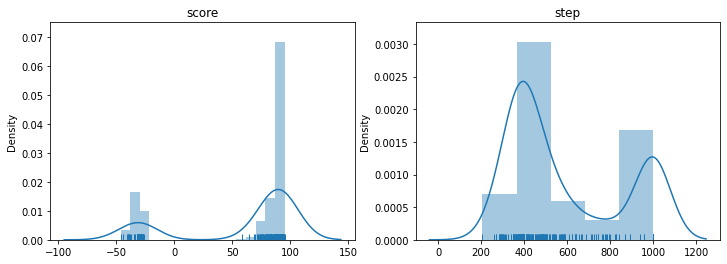

In [22]:
# score, step 분포 확인
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.distplot(scores, rug=True, ax=ax[0])
sns.distplot(steps, rug=True, ax=ax[1])

print(np.mean(scores))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


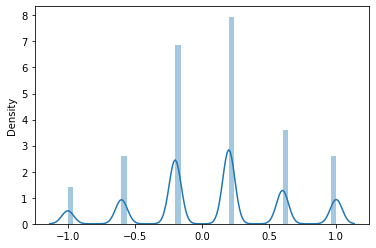

In [23]:
# 행동 분포 확인
sns.distplot(select_actions)

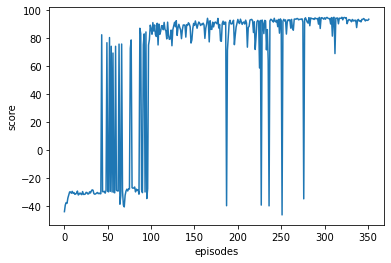

In [24]:
# score 그래프
plt.plot(scores)
plt.xlabel('episodes')
plt.ylabel('score')
plt.show()

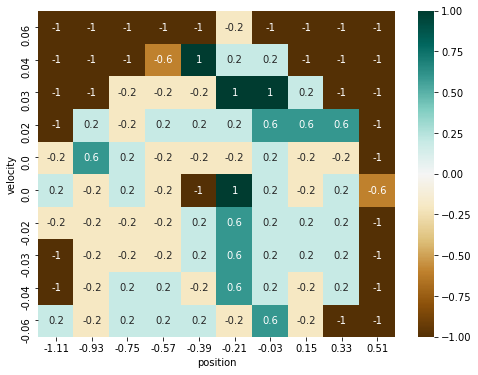

In [25]:
# 큐테이블 시각화
q_values = []
for i in range(state_grid_count):
    q_values.append([])
    for j in range(state_grid_count):
        action_idx = np.argmax(q_table[i][j])
        q_values[i].append(actions[action_idx])

plt.figure(figsize=(8, 6))
ax = sns.heatmap(q_values, annot=True, cmap='BrBG')
ax.set_xlabel('position')
ax.set_ylabel('velocity')
xticks = env.observation_space.low[0] + range(state_grid_count+1) * abs((env.observation_space.high[0] - env.observation_space.low[0]) / state_grid_count)
xticks = [int((xticks[idx] + xticks[idx+1]) / 2 * 100) / 100 for idx, xtick in enumerate(xticks[:-1])]
ax.set_xticklabels(xticks)
yticks = env.observation_space.low[1] + range(state_grid_count+1) * abs((env.observation_space.high[1] - env.observation_space.low[1]) / state_grid_count)
yticks = [int((yticks[idx] + yticks[idx+1]) / 2 * 100) / 100 for idx, ytick in enumerate(yticks[:-1])]
ax.set_yticklabels(yticks)
ax.invert_yaxis()
plt.show()

In [26]:
# 큐러닝 에이전트 실행 결과 확인
env.close()
if colab:
  env = wrap_env(gym.make('MountainCarContinuous-v0'))
else:
  env = gym.make('MountainCarContinuous-v0')

score = 0
step = 0
previous_obs = env.reset()

while True:
    state_idx = obs_to_state(env, previous_obs)
    if random.random() < epsilon:
        action_idx = random.randint(0, action_grid_count-1)
        action = actions[action_idx]
    else:
        logits = q_table[state_idx[0]][state_idx[1]]
        action_idx = np.argmax(softmax(logits))
        action = actions[action_idx]

    obs, reward, done, info = env.step([action])
    previous_obs = obs
    score += reward
    step += 1
    
    if done:  
        env.close()      
        break

print('score:', score)
print('step:', step)

if colab:
    show_video()


score: 92.91199960160252
step: 388
